In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/new_data.csv')
print(df.head())

In [ ]:
columns_to_convert = ['age_first_funding_year', 'age_last_funding_year', 'age_first_milestone_year',
                      'age_last_milestone_year', 'relationships', 'funding_rounds', 'funding_total_usd', 'milestones']

columns_to_keep = [col for col in df.columns if col not in columns_to_convert]
df_to_keep = df[columns_to_keep]
df_converted = pd.get_dummies(df[columns_to_convert], columns=columns_to_convert, prefix=columns_to_convert)
data = pd.concat([df_to_keep, df_converted], axis=1)
print(data)



In [ ]:
X = data.drop(columns=['status'])
y = data['status']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train, y_train)

MultinomialNB()

In [ ]:
predictions = naive_bayes_classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, predictions)

print("Confusion Matrix:")
print(conf_matrix)


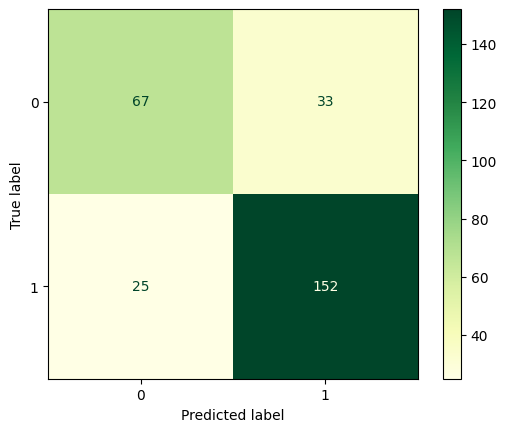

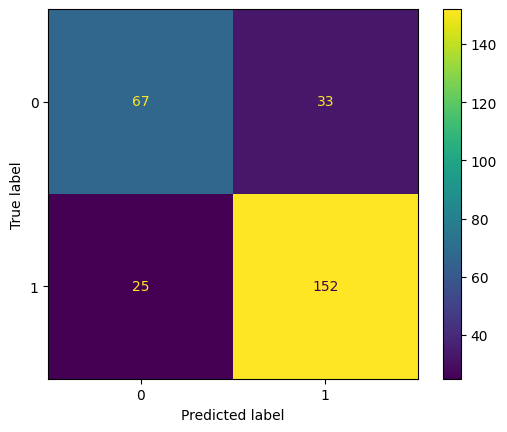

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)
import matplotlib.pyplot as plt


labels = [0,1]
cm = confusion_matrix(y_test, predictions, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.YlGn)
disp.plot();

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)

print(f'Accuracy is : {accuracy}')
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')


Accuracy is : 0.7906137184115524
Precision: 0.8216216216216217
Recall: 0.8587570621468926
F1-score: 0.8397790055248618


In [ ]:
#Cross Validation

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
!pip install --upgrade scikit-learn
from sklearn.metrics import DistanceMetric
!pip install --upgrade imbalanced-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 44.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 2.1 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [ ]:
X = data.drop(columns=['status'])
y = data['status']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_predict
from sklearn import metrics

# Create a StratifiedKFold object
stratified_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

cnt = 1
# Use the stratified_cv object in the loop
for train_index, test_index in stratified_cv.split(X, y):
    print(f'Fold: {cnt}, Train set: {len(train_index)}, Test set: {len(test_index)}')
    cnt += 1

# Create the MultinomialNB classifier
classifier = MultinomialNB()

# Use cross_val_predict to get predicted values
predicted = cross_val_predict(classifier, X, y, cv=stratified_cv)

# Calculate and print the average accuracy score
accuracy = metrics.accuracy_score(y, predicted)
print(f'Average Accuracy: {"{:.2f}".format(accuracy)}')




Fold: 1, Train set: 830, Test set: 93
Fold: 2, Train set: 830, Test set: 93
Fold: 3, Train set: 830, Test set: 93
Fold: 4, Train set: 831, Test set: 92
Fold: 5, Train set: 831, Test set: 92
Fold: 6, Train set: 831, Test set: 92
Fold: 7, Train set: 831, Test set: 92
Fold: 8, Train set: 831, Test set: 92
Fold: 9, Train set: 831, Test set: 92
Fold: 10, Train set: 831, Test set: 92
Average Accuracy: 0.78


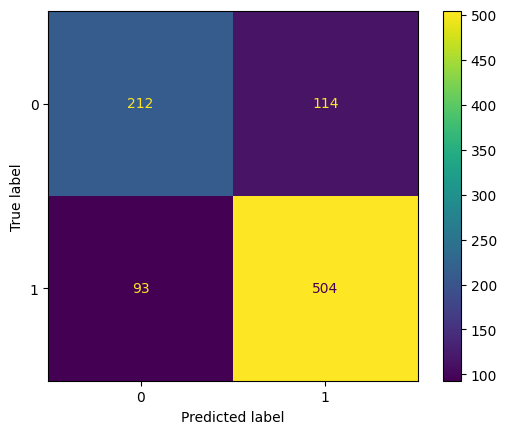

In [ ]:
# Calculate and print the confusion matrix using the test set
labels = [0, 1]
cm = confusion_matrix(y, predicted, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y, predicted)

print(f'Accuracy is : {accuracy}')
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, predictions)


recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')


Accuracy is : 0.7757313109425785
Precision: 0.8216216216216217
Recall: 0.8587570621468926
F1-score: 0.8397790055248618


In [ ]:
# Gird Search

Best Parameters:  {'alpha': 1.5}
Best Accuracy:  0.7823398784478729
Average Accuracy: 0.81
Precision: 0.8352
Recall: 0.8743718592964824
F1-score: 0.8543371522094927


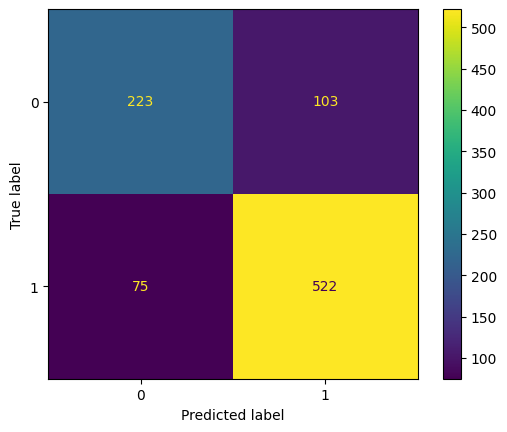

In [ ]:
from sklearn.model_selection import GridSearchCV

# Create the MultinomialNB classifier
classifier = MultinomialNB()

# Define the parameter grid for Grid Search
param_grid = {'alpha': [0.1, 0.5, 1.0, 1.5, 2.0]}

# Create a GridSearchCV object
grid_search = GridSearchCV(classifier, param_grid, cv=stratified_cv, scoring='accuracy')

# Fit the model with the training data
grid_search.fit(X, y)

# Print the best parameters and corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

# Use the best model for prediction
best_classifier = grid_search.best_estimator_
predicted = best_classifier.predict(X)

# Calculate and print the average accuracy score
accuracy = metrics.accuracy_score(y, predicted)
print(f'Average Accuracy: {"{:.2f}".format(accuracy)}')

# Calculate and print the confusion matrix using the test set
labels = [0, 1]
cm = confusion_matrix(y, predicted, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

# Other evaluation metrics
precision = precision_score(y, predicted)
recall = recall_score(y, predicted)
f1 = f1_score(y, predicted)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')


In [ ]:
#SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
# Create and fit the Multinomial Naive Bayes model on the resampled data
naive_bayes_classifier_resample = MultinomialNB()
naive_bayes_classifier_resample.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
predictions = naive_bayes_classifier_resample.predict(X_test)

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

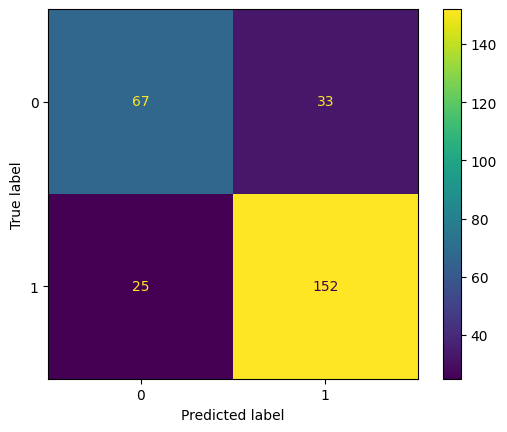

In [ ]:
labels = [0,1]
cm = confusion_matrix(y_test, predictions, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

In [ ]:
accuracy = accuracy_score(y_test, predictions)

print(f'Accuracy is : {accuracy}')
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')


In [ ]:
#feature_importance

In [ ]:
# Get class log probabilities for each feature
log_probabilities = naive_bayes_classifier_resample.feature_log_prob_

# Calculate feature importances (absolute log probabilities)
importances = np.abs(log_probabilities[1] - log_probabilities[0])

# Create a DataFrame to display feature importances
feature_importance = pd.DataFrame({'Feature': X_train_resampled.columns, 'Importance': importances})
feature_importance = feature_importance.sort_values('Importance', ascending=True).tail(30)

# Plot the feature importances
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6), color='mediumseagreen')